# 데이터 EDA

데이터셋에 대한 탐색적 데이터 분석(EDA)을 수행

In [1]:
import platform
import matplotlib.pyplot as plt

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (예: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("그래프의 한글이 깨질 수 있습니다.")

## 1. 데이터 불러오기

모든 CSV 파일을 pandas DataFrame으로 불러오고, 분석에 필요한 라이브러리를 임포트합니다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

begin_inventory = pd.read_csv('../data/drinksight-2024-begin-inventory.csv')
end_inventory = pd.read_csv('../data/drinksight-2024-end-inventory.csv')
purchase_prices = pd.read_csv('../data/drinksight-2024-purchase-prices.csv')
purchases = pd.read_csv('../data/drinksight-2024-purchases.csv')
sales = pd.read_csv('../data/drinksight-2024-sales.csv')
vendor_invoice = pd.read_csv('../data/drinksight-2024-vendor-invoice.csv')

## 2. 데이터 개요

데이터 타입과 null이 아닌 값의 개수를 포함하여 각 DataFrame의 요약 정보를 확인하고 기술 통계량을 생성합니다.

#### `begin_inventory`

In [4]:
begin_inventory.head(3)

,inventory_id,store_id,city,brand_id,item,size,on_hand,price,begin_date
0,1_SPARROW_58,1,Sparrow,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_SPARROW_60,1,Sparrow,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_SPARROW_62,1,Sparrow,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01


In [5]:
begin_inventory.info()
print()
begin_inventory.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  206529 non-null  object 
 1   store_id      206529 non-null  int64  
 2   city          206529 non-null  object 
 3   brand_id      206529 non-null  int64  
 4   item          206529 non-null  object 
 5   size          206529 non-null  object 
 6   on_hand       206529 non-null  int64  
 7   price         206529 non-null  float64
 8   begin_date    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB



,store_id,brand_id,on_hand,price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


- Price만 수치형 데이터

#### `end_inventory`

end_inventory.head(3)

In [6]:
end_inventory.info()
print()
end_inventory.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  224489 non-null  object 
 1   store_id      224489 non-null  int64  
 2   city          223205 non-null  object 
 3   brand_id      224489 non-null  int64  
 4   item          224489 non-null  object 
 5   size          224489 non-null  object 
 6   on_hand       224489 non-null  int64  
 7   price         224489 non-null  float64
 8   end_date      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB



,store_id,brand_id,on_hand,price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


#### `purchase_prices`

In [7]:
purchase_prices.head(3)

,brand_id,item,price,size,item_volume,classification,purchase_price,vendor_id,vendor
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP


In [8]:
purchase_prices.info()
print()
purchase_prices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_id        12261 non-null  int64  
 1   item            12260 non-null  object 
 2   price           12261 non-null  float64
 3   size            12260 non-null  object 
 4   item_volume     12260 non-null  object 
 5   classification  12261 non-null  int64  
 6   purchase_price  12261 non-null  float64
 7   vendor_id       12261 non-null  int64  
 8   vendor          12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB



,brand_id,price,classification,purchase_price,vendor_id
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


#### `purchases`

In [9]:
purchases.head(3)

,inventory_id,store_id,brand_id,item,size,vendor_id,vendor,purchase_order_number,purchase_order_date,receiving_date,invoice_date,pay_date,purchase_price,quantity,dollars,classification
0,69_PENGUIN_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_FLAMINGO_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PUFFIN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1


In [10]:
purchases.info()
print()
purchases.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   inventory_id           object 
 1   store_id               int64  
 2   brand_id               int64  
 3   item                   object 
 4   size                   object 
 5   vendor_id              int64  
 6   vendor                 object 
 7   purchase_order_number  int64  
 8   purchase_order_date    object 
 9   receiving_date         object 
 10  invoice_date           object 
 11  pay_date               object 
 12  purchase_price         float64
 13  quantity               int64  
 14  dollars                float64
 15  classification         int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB



,store_id,brand_id,vendor_id,purchase_order_number,purchase_price,quantity,dollars,classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00


#### `sales`

In [11]:
sales.head(3)

,inventory_id,store_id,brand_id,item,size,sales_quantity,sales_dollars,sales_price,sales_date,item_volume,classification,excise_tax,vendor_id,vendor
0,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_SPARROW_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [12]:
sales.info()
print()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   inventory_id    object 
 1   store_id        int64  
 2   brand_id        int64  
 3   item            object 
 4   size            object 
 5   sales_quantity  int64  
 6   sales_dollars   float64
 7   sales_price     float64
 8   sales_date      object 
 9   item_volume     float64
 10  classification  int64  
 11  excise_tax      float64
 12  vendor_id       int64  
 13  vendor          object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.3+ GB



,store_id,brand_id,sales_quantity,sales_dollars,sales_price,item_volume,classification,excise_tax,vendor_id
count,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07,1.282536e+07
mean,4.389572e+01,1.215460e+04,2.566623e+00,3.524758e+01,1.569027e+01,9.394389e+02,1.413892e+00,1.479431e+00,7.125907e+03
std,2.353947e+01,1.236843e+04,4.551810e+00,8.835689e+01,1.512728e+01,6.993202e+02,4.925295e-01,4.736633e+00,8.742565e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,2.300000e+01,3.663000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,2.100000e-01,3.252000e+03
50%,4.700000e+01,6.349000e+03,1.000000e+00,1.899000e+01,1.299000e+01,7.500000e+02,1.000000e+00,7.500000e-01,4.692000e+03
75%,6.600000e+01,1.795400e+04,2.000000e+00,3.499000e+01,1.899000e+01,1.000000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,8.100000e+01,9.063100e+04,1.231000e+03,2.606114e+04,5.799990e+03,2.000000e+04,2.000000e+00,1.260520e+03,2.013590e+05


#### `vendor_invoice`

In [13]:
vendor_invoice.head(3)

,vendor_id,vendor,invoice_date,purchase_order_number,purchase_order_date,pay_date,quantity,dollars,freight,approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,NaN


In [14]:
vendor_invoice.info()
print()
vendor_invoice.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              5543 non-null   int64  
 1   vendor                 5543 non-null   object 
 2   invoice_date           5543 non-null   object 
 3   purchase_order_number  5543 non-null   int64  
 4   purchase_order_date    5543 non-null   object 
 5   pay_date               5543 non-null   object 
 6   quantity               5543 non-null   int64  
 7   dollars                5543 non-null   float64
 8   freight                5543 non-null   float64
 9   approval               374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB



,vendor_id,purchase_order_number,quantity,dollars,freight
count,5543.00000,5543.000000,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,10889.419087,6058.880931,5.807338e+04,295.954301
std,34582.15841,1600.859969,14453.338164,1.402340e+05,713.585093
min,2.00000,8106.000000,1.000000,4.140000e+00,0.020000
25%,3089.00000,9503.500000,83.000000,9.678100e+02,5.020000
50%,7240.00000,10890.000000,423.000000,4.765450e+03,24.730000
75%,10754.00000,12275.500000,5100.500000,4.458718e+04,229.660000
max,201359.00000,13661.000000,141660.000000,1.660436e+06,8468.220000


## 3. 구매 데이터 병합 및 분석

`purchases`와 `vendor_invoice`를 `vendor`와 `purchase_order_number`를 기준으로 병합하여 전체 구매 데이터를 생성합니다.

In [19]:
all_purchases = pd.merge(purchases, vendor_invoice, on=['vendor', 'purchase_order_number'], how='left')

print("all_purchases.info():")
all_purchases.info()

all_purchases.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372474 entries, 0 to 2372473
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   inventory_id           object 
 1   store_id               int64  
 2   brand_id               int64  
 3   item                   object 
 4   size                   object 
 5   vendor_id_x            int64  
 6   vendor                 object 
 7   purchase_order_number  int64  
 8   purchase_order_date_x  object 
 9   receiving_date         object 
 10  invoice_date_x         object 
 11  pay_date_x             object 
 12  purchase_price         float64
 13  quantity_x             int64  
 14  dollars_x              float64
 15  classification         int64  
 16  vendor_id_y            float64
 17  invoice_date_y         object 
 18  purchase_order_date_y  object 
 19  pay_date_y             object 
 20  quantity_y             float64
 21  dollars_y              float64
 

## 4. 판매 데이터 심층 분석

월별 판매 동향을 파악하고, 가장 많이 팔린 상위 10개 품목을 확인합니다.

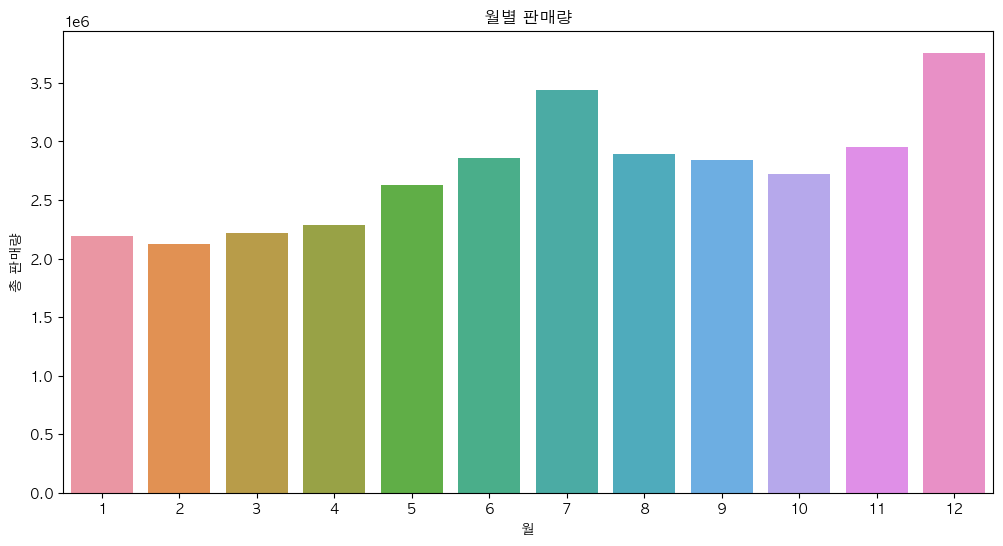

상위 10개 판매 품목:
item
Smirnoff 80 Proof               477926
Capt Morgan Spiced Rum          385838
Tito's Handmade Vodka           358288
Absolut 80 Proof                341297
Jack Daniels No 7 Black         334824
Dr McGillicuddy's Mentholmnt    302605
Bacardi Superior Rum            275874
Grey Goose Vodka                274794
Smirnoff Raspberry Vodka        265010
Jim Beam                        264054
Name: sales_quantity, dtype: int64


In [20]:
sales['sales_date'] = pd.to_datetime(sales['sales_date'])
sales['sales_month'] = sales['sales_date'].dt.month

sales_by_month = sales.groupby('sales_month')['sales_quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sales_month', y='sales_quantity', data=sales_by_month)
plt.title('월별 판매량')
plt.xlabel('월')
plt.ylabel('총 판매량')
plt.show()

top_selling_items = sales.groupby('item')['sales_quantity'].sum().sort_values(ascending=False).head(10)
print('상위 10개 판매 품목:')
print(top_selling_items)